<a href="https://colab.research.google.com/github/dwishashah/Machine-Learning/blob/main/ML_Exp2_2_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS DATASET

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/Iris (1).csv')

In [ ]:
df.drop('Id',axis=1,inplace=True)


In [ ]:
df.head(15)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
x=df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y=df['Species']

SPLIT

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_test_pred=classifier.predict(x_test)


In [ ]:
y_train_pred=classifier.predict(x_train)


In [ ]:
result=pd.DataFrame()
result["actual_y"]=y_test
result['predicted_y']=y_test_pred
print(result.sample(5))

            actual_y      predicted_y
113   Iris-virginica   Iris-virginica
24       Iris-setosa      Iris-setosa
125   Iris-virginica   Iris-virginica
54   Iris-versicolor  Iris-versicolor
108   Iris-virginica   Iris-virginica


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
print("accuracy score of test is ",accuracy_score(y_test,y_test_pred))
print("accuracy score of train is ",accuracy_score(y_train,y_train_pred))
cm=pd.DataFrame(confusion_matrix(y_test,y_test_pred),columns=list(range(0,3)))
print(cm)

accuracy score of test is  0.9333333333333333
accuracy score of train is  1.0
    0  1  2
0  14  0  0
1   0  7  1
2   0  1  7


In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
print("precision score is ",precision_score(y_test,y_test_pred,average=None))
print("recall score is ",recall_score(y_test,y_test_pred,average=None))
print("f1 score is ",f1_score(y_test,y_test_pred,average=None))


precision score is  [1.    0.875 0.875]
recall score is  [1.    0.875 0.875]
f1 score is  [1.    0.875 0.875]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("classification report is ")
print(classification_report(y_test,y_test_pred))

classification report is 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30



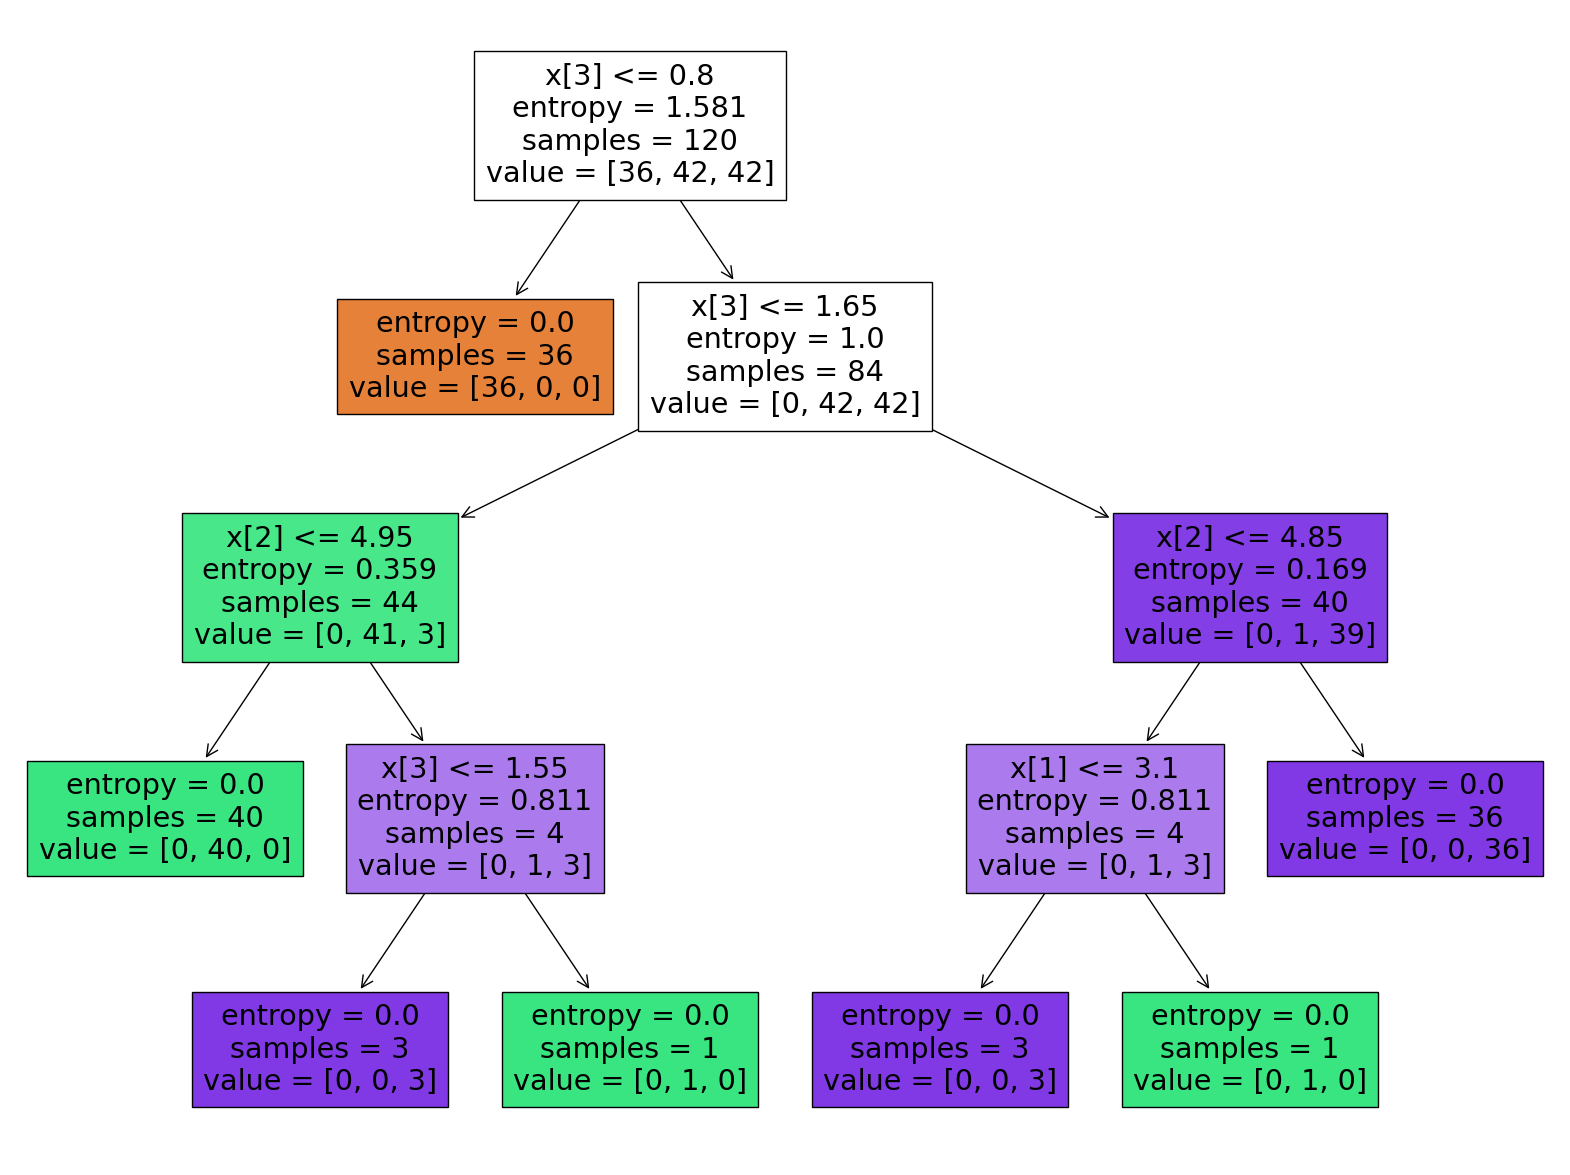

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(classifier,filled=True)
plt.show()


In [ ]:
print(x)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [ ]:
max_depth = classifier.tree_.max_depth
max_depth

In [ ]:
for i in range(max_depth):

  dtc =DecisionTreeClassifier(max_depth=i+1)
  dtc.fit(x_train,y_train)

  train_z = dtc.predict(x_train)
  train_z_prob = dtc.predict_proba(x_train)[:,1]

  test_z = dtc.predict(x_test)
  test_z_prob = dtc.predict_proba(x_test)[:,1]

  a=accuracy_score(y_test, test_z)
  print(f"model accuracy at depth {i+1} is :{a}")

In [ ]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 5)]

for i in values:

 model = DecisionTreeClassifier(max_depth=i)

 model.fit(x_train, y_train)

 train_yhat = model.predict(x_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 
 test_yhat = model.predict(x_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)

 print('%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()